<a href="https://colab.research.google.com/github/ngocbaosp/ML-Projects/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Course: Machine Learning 
#### Project: 01
#### Team members
#### + Mauro Travieso Pena
#### + Quoc Huy Luong
#### + Ngoc Bao Tran
***


## Random Forrest Classifier


### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Install library
!pip3 install -U yellowbrick

%matplotlib inline

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (0.9.1)


In [0]:
from sklearn.decomposition import PCA
from sklearn import preprocessing


# MyPCA

def myPCA(data,n):
    pca = PCA(n_components=n)
    pca.fit(data)
    df = pca.transform(data)
    PCA_Data = pd.DataFrame(df)
    return PCA_Data



# myNormalize

def myNormalize(data):
    min_max_scaler = preprocessing.MinMaxScaler()
    Normalized_Data = min_max_scaler.fit_transform(data)
    Normalized_Data = pd.DataFrame(Normalized_Data)
    return Normalized_Data



# myEncode

def myEncode(data,col): 
    NewData_Encode = data.copy()
    NewData_Encode = pd.get_dummies(NewData_Encode, columns=col, prefix = col)
    return NewData_Encode



# myCleanAndTransformData


def myCleanAndTransformData(data):
    
    #Drop null rows
    NewData = data.dropna()
    #Remove unknown ata
    NewData = NewData[NewData['episodes']!='Unknown']
    #Add a new column rating class 
    NewData['Class']=1
    # 1: High
    # or 0: Low based on rating
    NewData.loc[NewData['rating'] >= NewData['rating'].mean(), 'Class'] = 1
    NewData.loc[NewData['rating'] < NewData['rating'].mean(), 'Class'] = 0
    
    #Split genre values into rows
    NewData = pd.DataFrame(NewData.genre.str.split(',').tolist(), index=[NewData.anime_id,NewData.type,NewData.episodes,NewData.rating,NewData.members,NewData.Class]).stack()
    NewData = NewData.reset_index([0,'anime_id','type','episodes','rating','members','Class'])
    NewData.columns=['anime_id','type','episodes','rating','members','Class','genre']
    
    #Encode type feature: 6 unique values
    NewData = myEncode(NewData,['type'])
 
    #Encode genre feature: 82 unique values
    NewData = myEncode(NewData,['genre'])
 
     #Drop anmie_id,rating,Class
    NewData = NewData.drop(['rating'],axis=1)
    NewData = NewData.drop(columns=['anime_id'])
    #NewData = NewData.drop(columns=['Class'])  
    
    return NewData

### Load data from files


In [3]:
df = pd.read_csv('anime.csv')
df.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


### Clean and Transform Data


In [4]:
cleaned_data= myCleanAndTransformData(df)
df_test = cleaned_data['Class']
df_train = cleaned_data.drop(columns=['Class'])
df_train.shape

(35201, 90)

### Normalize Data


In [5]:
scaled_df = myNormalize(df_train)

scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.034673,0.782769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
scaled_df.shape

(35201, 90)

### Using PCA


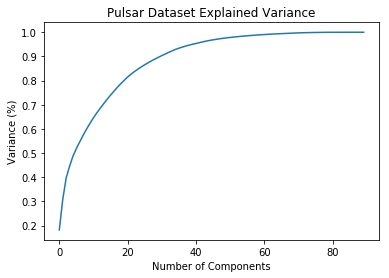

In [7]:
# https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(scaled_df)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [8]:
# Now we will choose 40 components so we can preserve something around 98.8% or 99% of the total variance of the data
pca = PCA(n_components=40)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df))
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-0.311566,0.786508,-0.420821,0.005236,-0.078663,-0.049645,-0.062636,0.007171,-0.075350,-0.030938,0.086266,-0.139424,-0.157024,0.028298,-0.081143,-0.232695,-0.299071,0.804720,-0.258783,-0.007692,-0.094833,-0.108047,-0.062471,0.025740,0.003308,-0.024884,-0.033482,-0.004885,-0.011800,-0.006682,-0.011431,-0.014475,0.009632,-0.010758,-0.008051,-0.004226,0.005829,-0.012833,-0.006396,-0.009601
1,-0.284842,0.763991,-0.412009,-0.010872,-0.110066,-0.087028,-0.096769,0.054629,-0.179466,-0.045545,0.764386,0.581466,0.033979,-0.066734,0.030943,0.068184,0.010381,-0.031948,-0.043612,0.008156,-0.027473,-0.040188,-0.033360,0.004769,0.006547,-0.016053,-0.028663,-0.009390,-0.005372,-0.003998,-0.006959,-0.012978,0.006481,-0.011577,-0.008159,-0.001470,0.008858,-0.012434,-0.008124,-0.010027
2,-0.284838,0.767910,-0.395570,-0.007614,-0.091869,-0.059765,-0.062084,0.036504,-0.086830,-0.024722,0.092182,-0.282591,-0.451935,-0.569127,0.527432,0.287043,0.035418,-0.060916,-0.105730,-0.014491,-0.031116,-0.062840,-0.045536,0.012601,0.004867,-0.021656,-0.033687,-0.011322,-0.009136,-0.006080,-0.009201,-0.014687,0.006691,-0.012954,-0.009785,-0.005426,0.006993,-0.014404,-0.012730,-0.009968
3,-0.291600,0.777175,-0.408316,0.000301,-0.080828,-0.049799,-0.056889,0.019143,-0.070776,-0.027971,0.078032,-0.143404,-0.122694,-0.013061,-0.109525,-0.389589,-0.602804,-0.563638,-0.290746,-0.050586,-0.053022,-0.099427,-0.061852,0.024405,0.000838,-0.027186,-0.035572,-0.010709,-0.013650,-0.007613,-0.011988,-0.015385,0.007742,-0.011515,-0.009254,-0.007890,0.004719,-0.014056,-0.011697,-0.011760
4,0.732145,-0.153155,-0.102203,-0.458230,0.816867,0.046174,0.015774,-0.064782,0.014353,-0.005006,0.000577,0.017518,-0.007159,0.008127,0.015712,-0.003268,-0.012138,-0.006506,-0.013958,0.005179,-0.027952,-0.018684,-0.009759,-0.000994,0.018403,0.005809,-0.017969,0.010406,0.021426,0.001630,0.007952,-0.013071,0.020526,-0.015508,-0.006488,0.026839,0.027397,-0.017569,0.000264,0.041775


### Splitting data


In [0]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.3, random_state=109)

# Split dataset into training set and test set from normalized data
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(scaled_df, df_test, test_size=0.3, random_state=109)

# Split dataset into training set and test set from PCA data
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(pca_df, df_test, test_size=0.3, random_state=109)


### Generating model


In [10]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with original data
clf_1 = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf_1.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
# Create a Random Forest Classifier with normalized data
clf_2 = RandomForestClassifier(n_estimators=100)

# # Train the model using the training sets
clf_2.fit(X_n_train, y_n_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
# Create a Random Forest Classifier with PCA data
clf_3 = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf_3.fit(X_p_train, y_p_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Evaluating model


In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import model_selection


# Predict the response for test dataset
y_pred = clf_1.predict(X_test)
print("Predict on Original data:")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))


Predict on Original data:
Accuracy:  0.7887510652400341
Classification report:                precision    recall  f1-score   support

           0       0.71      0.69      0.70      3748
           1       0.83      0.84      0.84      6813

    accuracy                           0.79     10561
   macro avg       0.77      0.77      0.77     10561
weighted avg       0.79      0.79      0.79     10561



In [14]:
# Predict the response for test dataset
y_n_pred = clf_2.predict(X_n_test)
print("Predict on Normalized data:")
print("Accuracy: ", metrics.accuracy_score(y_n_test, y_n_pred))
print("Classification report: ", classification_report(y_n_test, y_n_pred))

Predict on Normalized data:
Accuracy:  0.788182937221854
Classification report:                precision    recall  f1-score   support

           0       0.71      0.69      0.70      3748
           1       0.83      0.84      0.84      6813

    accuracy                           0.79     10561
   macro avg       0.77      0.77      0.77     10561
weighted avg       0.79      0.79      0.79     10561



In [15]:
# Predict the response for test dataset
y_p_pred = clf_3.predict(X_p_test)
print("Predict on PCA data:")
print("Accuracy: ", metrics.accuracy_score(y_p_test, y_p_pred))
print("Classification report: ")
print(classification_report(y_p_test, y_p_pred))


Predict on PCA data:
Accuracy:  0.7731275447400814
Classification report: 
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      3748
           1       0.82      0.83      0.82      6813

    accuracy                           0.77     10561
   macro avg       0.75      0.75      0.75     10561
weighted avg       0.77      0.77      0.77     10561



In [16]:
# Compute the accuracy score for all the cross validation folds.
scores_1 = model_selection.cross_val_score(clf_1, X_test, y_test, cv=5)
scores_2 = model_selection.cross_val_score(clf_2, X_n_test, y_n_test, cv=5)
scores_3 = model_selection.cross_val_score(clf_3, X_p_test, y_p_test, cv=5)

# Take the mean of the scores (because we have one for each fold)
print("Accuracy on Original Data:")
print("Accuracy and the 95% confidence interval of the estimate are: {0:.3f} (+/- {0:.2f})".format(scores_1.mean(), scores_1.std() * 2))

print("Accuracy on Normalized Data:")
print("Accuracy and the 95% confidence interval of the estimate are: {0:.3f} (+/- {0:.2f})".format(scores_1.mean(), scores_1.std() * 2))

print("Accuracy on PCA Data:")
print("Accuracy and the 95% confidence interval of the estimate are: {0:.3f} (+/- {0:.2f})".format(scores_1.mean(), scores_1.std() * 2))

Accuracy on Original Data:
Accuracy and the 95% confidence interval of the estimate are: 0.788 (+/- 0.79)
Accuracy on Normalized Data:
Accuracy and the 95% confidence interval of the estimate are: 0.788 (+/- 0.79)
Accuracy on PCA Data:
Accuracy and the 95% confidence interval of the estimate are: 0.788 (+/- 0.79)


### Model Tunning with Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [5, 8, 15],
    "min_samples_leaf" : [1, 2, 4],
    'min_samples_split': [2, 3, 5],
    'max_features': ['sqrt'], 
    'criterion': ['gini']
}

In [0]:
# Apply Grid Search to find the best estimator with classifier on PCA Data
grid = GridSearchCV(clf_3, params_grid, refit=True, verbose=3, cv=5, scoring="accuracy", n_jobs=1)


In [19]:
# Train the model
grid.fit(X_n_train, y_n_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.801, total=   0.7s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.791, total=   0.7s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.808, total=   0.7s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.796, total=   0.7s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.752, total=   0.7s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300, score=0.778, total=   2.0s
[CV] criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimato

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 22.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [20]:
print("The best score is: {}".format(grid.best_score_))
print("The best estimator is: {}".format(grid.best_estimator_))
print("The best params is: {}".format(grid.best_params_))


The best score is: 0.8152191558441558
The best estimator is: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
The best params is: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}


In [21]:
# Re-run predictions with best model
model = grid.best_estimator_
grid_predictions = model.predict(X_n_test)
grid

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [22]:
# Re-evaluate model
print("With normalized data and the best estimator from Grid Search:")
print("Accuracy: ", metrics.accuracy_score(y_p_test, grid_predictions))
print("Classification report: ")
print(classification_report(y_p_test, grid_predictions))


With normalized data and the best estimator from Grid Search:
Accuracy:  0.811760249976328
Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      3748
           1       0.84      0.87      0.86      6813

    accuracy                           0.81     10561
   macro avg       0.80      0.79      0.79     10561
weighted avg       0.81      0.81      0.81     10561



### AUC

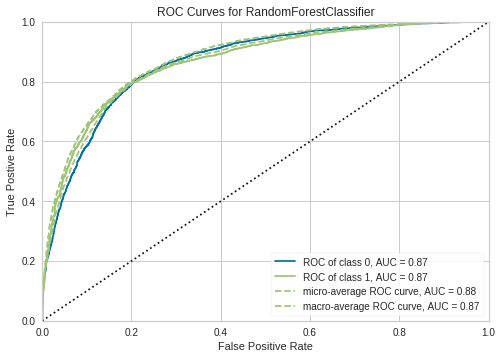

In [25]:
from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model)
# micro=False, macro=False, per_class=False
visualizer.fit(X_p_train, y_p_train)  # Fit the training data to the visualizer
visualizer.score(X_p_test, y_p_test)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

### Validation curve

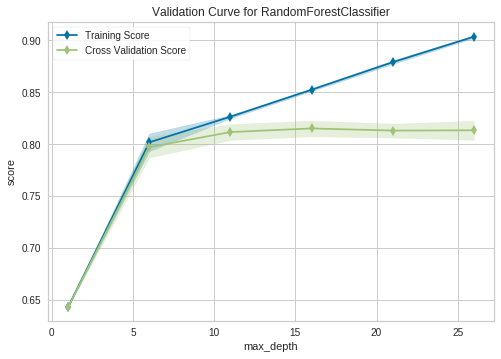

In [26]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve

# Create the validation curve visualizer
cv = StratifiedKFold(12)
param_range = np.arange(1, 30, 5)

viz = ValidationCurve(
    RandomForestClassifier(n_estimators=100), param_name="max_depth", param_range=param_range,
    cv=cv, scoring="accuracy", n_jobs=1
)

viz.fit(X_train, y_train)
viz.poof()

In this plot you can see the training scores and validation scores of an Random Forrest for different values of the kernel parameter max_depth. The training score is everywhere higher than the validation score; the training score is monotonically improving with increased model complexity; and the validation score is increased slightly.

From the validation curve, we can read-off that the optimal trade-off between bias and variance is found at max_depth = 15

### Learning curve

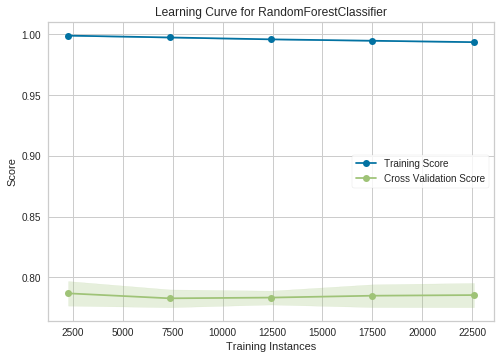

In [27]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(12)

viz = LearningCurve(
    RandomForestClassifier(n_estimators=100), cv=cv,
    scoring='accuracy', n_jobs=1
)

# Fit and poof the visualizer
viz.fit(X_train, y_train)
viz.poof()

Our learning algorithm (random forests) suffers from high variance and quite a low bias, overfitting the training data.  

At this point, here are a couple of things we could do to improve our model:  

*   Adding more training instances.
*   Increase the regularization for our current learning algorithm. This should decrease the variance and increase the bias.
*   Reducing the numbers of features in the training data we currently use. The algorithm will still fit the training data very well, but due to the decreased number of features, it will build less complex models. This should increase the bias and decrease the variance.

